# An Introduction to Linear Regression

In machine learning we often want to make a prediction based on existing data. We do this by creating a model of the data. The data below is fictitious data for income for the Bankside Brewery for the last 12 months.

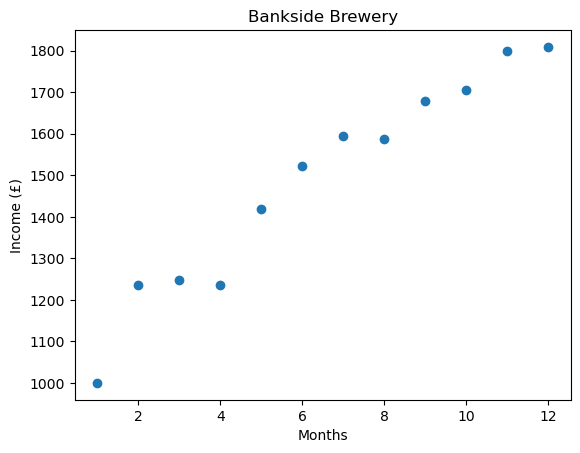

In [1]:
import matplotlib.pyplot as plt

months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
income = [1000, 1235, 1247, 1236, 1418, 1523, 1595, 1588, 1678, 1705, 1800, 1809]

plt.plot(months, income, "o")

plt.title("Bankside Brewery")

plt.xlabel("Months")
plt.ylabel("Income (£)")

plt.show()

The most basic model we can produce is to fit a line to the data. This is called Linear Regression. We can determine a line based upon its slope and intercept for each point y on a line
*y = mx + b*

where m is the slope, b is the intercept, y is a known point on the y-axis corresponding to a given point on the x-axis.

The purpose of Linear Regression is to find the 'best' slope (m) and intercept (b) for the given data. In the example below I have estimated these for you but you can adjust the values for m and b to get a better fit. 

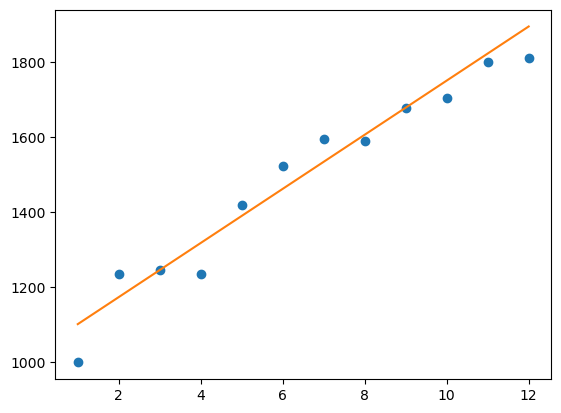

In [18]:
months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
income = [1000, 1235, 1247, 1236, 1418, 1523, 1595, 1588, 1678, 1705, 1800, 1809]
#slope:
m = 72
#intercept:
b = 1030

y = [m*x + b for x in months]

plt.plot(months, income, "o")
plt.plot(months, y)

plt.show()

The question of course is what do we mean by *best*. We will meet a number of ways of calculating this but we need some way of measuring error or loss. A common way to do this is to calculate the sum of squared distance from  point to the line. If we square the distance then points above and below the line both contribute a positive value.
![title](error.png)

In the example above the squared distance for  A is 9 and the squared distance for B is 16 so the total loss/error for the model is *9 + 16 = 25*.
Remember the goal of Linear Regression is to minimise the error so if we can find a line with a error than 25, then that would be a better fit for this model.

In [4]:
x = [1,2,3]
y = [3,1,2]
error = 0
m = 1
b = 0

y_hat = [m * xVal + b for xVal in x]
print(y_hat)
for i in  range(len(y)):
    error += (y[i] - y_hat[i]) ** 2

print(error)

error = 0
m = 0.5
b = 1
y_hat = [m * xVal + b for xVal in x]
#print(y_hat)
for i in  range(len(y)):
    error += (y[i] - y_hat[i]) ** 2
    
print(error)



[1, 2, 3]
6
3.5


The question of course remains how does the machine learning model calculate values for *m* and *b* to minimise loss. This is commonly done using an either algorithmic approach called Gradient Descent or mathematically.

## Gradient Descent
Gradient descent is an algorithmic approach to minimising loss. Think of it as moving down a hill until we reach the bottom. The gradient is the slope of the curve at a given point. We move in the direction that is optimal for decreasing the loss.
![title](gradient_descent.png)
The gradient is calculated using differential calculus but this is beyound the scope of this course, you need to understand the principle. Lets say that we are trying to optimise the intercept at a given point, if the slope is downwards at that point then we can increase the intercept to lower the loss and follow the gradient downwards. We continue the process until we reach the point of convergence.

The formula for calculating the gradient of loss as the intercept (b) changes is as follows:
![title](b_formula.png)
* N is the number of points in the dataset
* m is the current guess for the gradient
* b is the current guess for the intercept

1. For all *y* and *x* values find the sum of y_value - (m * x_value + b)
2. Multiply the sum by -2N

In [4]:
def gradient_at_b(x, y, m, b):
    diff = 0
    N = len(x)
    for i in range(N):
      diff += (y[i] - ((m * x[i]) + b))     

    b_gradient = -2/N * diff
    return b_gradient

The formula for finding how the loss changes as the slope (m) changes is as follows
![title](m_formula.png)
* N is the number of points in the dataset
* m is the current guess for the gradient
* b is the current guess for the intercept
1. For all the *x* and *y* values find the sum of x_value * (y_value - (m * x_value + b)
2. Multiply the sum by -2N

In [5]:
def gradient_at_m(x, y, m, b):
    diff = 0
    N = len(x)
    for i in range(N):
      y_val = y[i]
      x_val = x[i]
      diff += x_val*(y_val - ((m * x_val) + b))
    m_gradient = -2/N * diff
    return m_gradient

Having calculated the gradient we need some way of moving in that direction. However we need some way of controlling the size of the step we're going to take as we don't want to overshoot the point of convergence. We scale the size of the step by multiplying the gradient by a learning rate. For now lets specify a learning rate of 0.01

In [6]:
def step_gradient(x, y, b_current, m_current):
  b_gradient = gradient_at_b(x, y, b_current, m_current)
  m_gradient = gradient_at_m(x, y, b_current, m_current)
  b = b_current - (0.01 * b_gradient)
  m = m_current - (0.01 * m_gradient)
  return [b, m]

In [7]:
months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
income = [1000, 1235, 1247, 1236, 1418, 1523, 1595, 1588, 1678, 1705, 1800, 1809]

# starting intercept value
b = 0
#starting slope value
m = 0

b,m = step_gradient(months, income, b, m)

print(b, m)

29.72333333333333 209.85333333333332


Our program needs to iteratively find the best values for *m* and *b*. For each *m* and *b* we generate we want to move in the direction of the gradient, but how far? If we take very small steps our model may take too many iterations and never produce an answer. If the steps are too large it may overshoot the minimum and never converge. We don't need to find the optimal learning rate, just one that returns an answer with an acceptable degree of efficiency.

Let's rewrite the step_gradient function so we can pass the learning rate as a parameter

In [8]:
def step_gradient(b_current, m_current, x, y, learning_rate):
    b_gradient = gradient_at_b(x, y, b_current, m_current)
    m_gradient = gradient_at_m(x, y, b_current, m_current)
    b = b_current - (learning_rate * b_gradient)
    m = m_current - (learning_rate * m_gradient)
    return [b, m]

Finally lets write a gradient_descent function which takes x, y, the learning rate and the number of times we wish to iterate.

In [9]:
def gradient_descent(x, y, learning_rate, num_iterations):
  b = 0
  m = 0
  for i in range(num_iterations):
    b,m = step_gradient(b, m, x, y, learning_rate)
  
  
  return [b,m]

Lastly lets put it all together and run it on our Bankside Brewery data

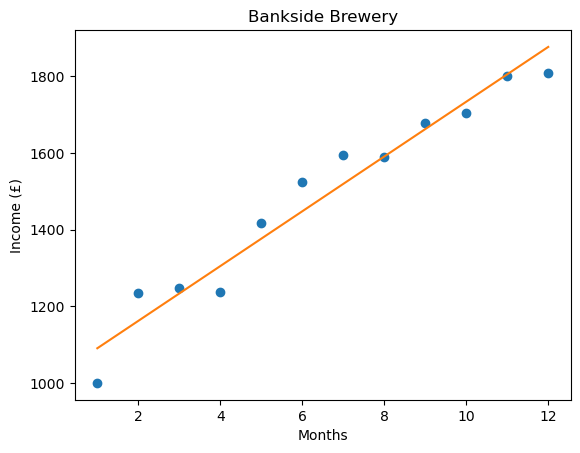

In [20]:
def gradient_at_b(x, y, b, m):
  N = len(x)
  diff = 0
  for i in range(N):
    x_val = x[i]
    y_val = y[i]
    diff += (y_val - ((m * x_val) + b))
  b_gradient = -(2/N) * diff  
  return b_gradient

def gradient_at_m(x, y, b, m):
  N = len(x)
  diff = 0
  for i in range(N):
      x_val = x[i]
      y_val = y[i]
      diff += x_val * (y_val - ((m * x_val) + b))
  m_gradient = -(2/N) * diff  
  return m_gradient


def step_gradient(b_current, m_current, x, y, learning_rate):
    b_gradient = gradient_at_b(x, y, b_current, m_current)
    m_gradient = gradient_at_m(x, y, b_current, m_current)
    b = b_current - (learning_rate * b_gradient)
    m = m_current - (learning_rate * m_gradient)
    return [b, m]
  

def gradient_descent(x, y, learning_rate, num_iterations):
  b = 0
  m = 0
  for i in range(num_iterations):
    b,m = step_gradient(b, m, x, y, learning_rate)
  
  
  return [b,m]

months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
income = [1000, 1235, 1247, 1236, 1418, 1523, 1595, 1588, 1678, 1705, 1800, 1809]


b, m = gradient_descent(months, income, 0.01, 1000)


y = [m*x + b for x in months]

plt.plot(months, income, "o")
plt.title("Bankside Brewery")

plt.xlabel("Months")
plt.ylabel("Income (£)")
plt.plot(months, y)

plt.show()

In [11]:
print(m)
print(b)

71.44126578024726
1018.9650477850287


In [32]:
#using the Linear Regression model generated calculate the predicted income for month 13, 14 and 15 and assign them to the variables below.

def predict(month, slope, intercept):
    return int(slope*month + intercept)

month_13 = predict(13, m, b)
month_14 = predict(14, m, b)
month_15 = predict(15, m, b)

print(f"Month 13: {month_13}")
print(f"Month 14: {month_14}")
print(f"Month 15: {month_15}")

Month 13: 1941
Month 14: 2012
Month 15: 2083
